In [14]:
import gensim
import logging
logging.basicConfig(format="%(asctime)s: %(levelname)s : %(message)s", level=logging.INFO)
from gensim.models import word2vec
from gensim.corpora import Dictionary

sentences = word2vec.PathLineSentences("WOTclean", max_sentence_length=5000)

#create a Gensim dictionary from the texts
dictionary = Dictionary(sentences)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in sentences]

2020-02-25 10:53:11,207: INFO : reading directory WOTclean/
2020-02-25 10:53:11,294: INFO : files read into PathLineSentences:WOTclean/CrossroadsOfTwilight.txt
WOTclean/CrownOfSwords.txt
WOTclean/DragonReborn.txt
WOTclean/EyeOfTheWorld.txt
WOTclean/FiresOfHeaven.txt
WOTclean/GatheringStorm.txt
WOTclean/GreatHunt.txt
WOTclean/KnifeOfDreams.txt
WOTclean/LordOfChaos.txt
WOTclean/MemoryOfLight.txt
WOTclean/PathOfDaggers.txt
WOTclean/ShadowRising.txt
WOTclean/TowersOfMidnight.txt
WOTclean/WintersHeart.txt
2020-02-25 10:53:11,304: INFO : reading file WOTclean/CrossroadsOfTwilight.txt
2020-02-25 10:53:11,571: INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-02-25 10:53:11,827: INFO : reading file WOTclean/CrownOfSwords.txt
2020-02-25 10:53:12,105: INFO : reading file WOTclean/DragonReborn.txt
2020-02-25 10:53:12,313: INFO : reading file WOTclean/EyeOfTheWorld.txt
2020-02-25 10:53:12,582: INFO : reading file WOTclean/FiresOfHeaven.txt
2020-02-25 10:53:12,916: INFO : reading fi

In [15]:
from gensim.models import LdaModel
%time lda = LdaModel(corpus, num_topics=5, \
                            id2word=dictionary, \
                            update_every=5, \
                            chunksize=10000, \
                            passes=10)


2020-02-25 10:54:09,635: INFO : using symmetric alpha at 0.2
2020-02-25 10:54:09,639: INFO : using symmetric eta at 0.2
2020-02-25 10:54:09,652: INFO : using serial LDA version on this node
2020-02-25 10:54:09,699: INFO : running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 873 documents, updating model once every 873 documents, evaluating perplexity every 873 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-25 10:54:16,604: INFO : -11.389 per-word bound, 2681.5 perplexity estimate based on a held-out corpus of 873 documents with 1600344 words
2020-02-25 10:54:16,605: INFO : PROGRESS: pass 0, at document #873/873
2020-02-25 10:54:18,875: INFO : topic #0 (0.200): 0.005*"perrin" + 0.005*"mat" + 0.004*"nynaeve" + 0.004*"lord" + 0.003*"aiel" + 0.003*"elayne" + 0.002*"tower" + 0.002*"egwene" + 0.002*"maybe" + 0.002*"city"
2020-02-25 10:54:18,877: INFO : topic #1 (0.200): 0.004*"mat" + 0.004*"egwene" + 0.004*"elayne" + 0.004*"nyna

2020-02-25 10:55:04,314: INFO : topic #4 (0.200): 0.008*"perrin" + 0.006*"elayne" + 0.006*"egwene" + 0.003*"didnt" + 0.003*"trollocs" + 0.003*"siuan" + 0.003*"gawyn" + 0.003*"min" + 0.003*"mat" + 0.002*"aviendha"
2020-02-25 10:55:04,315: INFO : topic diff=0.194905, rho=0.377964
2020-02-25 10:55:11,202: INFO : -8.721 per-word bound, 422.0 perplexity estimate based on a held-out corpus of 873 documents with 1600344 words
2020-02-25 10:55:11,202: INFO : PROGRESS: pass 6, at document #873/873
2020-02-25 10:55:13,607: INFO : topic #0 (0.200): 0.009*"perrin" + 0.009*"mat" + 0.004*"lord" + 0.003*"faile" + 0.002*"aiel" + 0.002*"loial" + 0.002*"maybe" + 0.002*"seanchan" + 0.002*"horses" + 0.002*"trollocs"
2020-02-25 10:55:13,609: INFO : topic #1 (0.200): 0.007*"mat" + 0.005*"moiraine" + 0.005*"nynaeve" + 0.005*"elayne" + 0.003*"lan" + 0.003*"thom" + 0.003*"egwene" + 0.003*"room" + 0.003*"door" + 0.002*"sword"
2020-02-25 10:55:13,610: INFO : topic #2 (0.200): 0.004*"aiel" + 0.004*"wise" + 0.003*

CPU times: user 5min 53s, sys: 6.03 s, total: 5min 59s
Wall time: 1min 31s


In [3]:
import numpy as np
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix

[(0,
  [('elayne', 0.010655665),
   ('nynaeve', 0.0074661872),
   ('mat', 0.006423942),
   ('aviendha', 0.0027038925),
   ('birgitte', 0.0027026604),
   ('thom', 0.0021316647),
   ('room', 0.0021237985),
   ('tower', 0.0019407524),
   ('maybe', 0.0019372385),
   ('palace', 0.0016958173),
   ('seanchan', 0.0016860564),
   ('door', 0.0016850829),
   ('egwene', 0.0016212105),
   ('lord', 0.0016070566),
   ('city', 0.0015678179),
   ('aiel', 0.0015312386),
   ('high', 0.0015167444),
   ('blue', 0.0014894744),
   ('except', 0.0014330389),
   ('smile', 0.001406937)]),
 (1,
  [('perrin', 0.00974831),
   ('moiraine', 0.004740807),
   ('mat', 0.0045570326),
   ('aiel', 0.004257348),
   ('egwene', 0.0035396914),
   ('faile', 0.0026023684),
   ('lord', 0.0025593666),
   ('ones', 0.0024659624),
   ('wise', 0.0024375087),
   ('maybe', 0.0023585241),
   ('lan', 0.0023254703),
   ('loial', 0.0021114047),
   ('night', 0.0020636837),
   ('trollocs', 0.0020555859),
   ('nynaeve', 0.0018055274),
   ('swo

In [5]:
maping = []
for i in range(14):
    maping.append([0] * 5)

    
i = 0
import os
filedir = "WOTclean"
for f in os.listdir(filedir):
    if f.endswith(".txt"):
        fopen = open(filedir + "/" + f)
        bow = dictionary.doc2bow(fopen.read().split())
        print(f, lda.get_document_topics(bow))
        for p in lda.get_document_topics(bow):
            maping[i][p[0]] = p[1]
        i += 1


CrownOfSwords.txt [(0, 0.51770884), (1, 0.19933835), (2, 0.13395408), (3, 0.03448471), (4, 0.11451402)]
LordOfChaos.txt [(0, 0.44373494), (1, 0.2952081), (2, 0.08818457), (3, 0.03912424), (4, 0.1337481)]
KnifeOfDreams.txt [(0, 0.55552995), (1, 0.06814501), (2, 0.1446348), (3, 0.09951806), (4, 0.13217215)]
EyeOfTheWorld.txt [(0, 0.016760621), (1, 0.8631797), (3, 0.105300575), (4, 0.014677131)]
TowersOfMidnight.txt [(0, 0.05770222), (2, 0.69548553), (3, 0.01723866), (4, 0.22211799)]
WintersHeart.txt [(0, 0.7025226), (1, 0.051449817), (2, 0.18432945), (3, 0.057033494)]
FiresOfHeaven.txt [(0, 0.5245951), (1, 0.36949268), (3, 0.027181692), (4, 0.07749798)]
DragonReborn.txt [(0, 0.25767943), (1, 0.4573756), (3, 0.060815737), (4, 0.22406718)]
GatheringStorm.txt [(2, 0.4845528), (3, 0.044043805), (4, 0.46466565)]
PathOfDaggers.txt [(0, 0.40472895), (1, 0.16508362), (2, 0.15839835), (3, 0.1337273), (4, 0.13806178)]
CrossroadsOfTwilight.txt [(0, 0.50401896), (1, 0.17713854), (2, 0.10016255), (3,

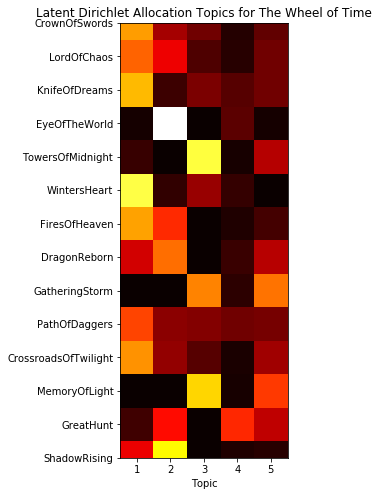

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 8))

plt.imshow(maping, cmap='hot', interpolation='nearest')
plt.yticks(range(14), [f[:-4] for f in os.listdir(filedir)])
plt.xticks(range(5), range(1, 6))
plt.xlabel("Topic")
plt.title("Latent Dirichlet Allocation Topics for The Wheel of Time")
plt.show()